### **`Netflix Movie`**

Business problem untuk kasus ini adalah : 

- Cari tahu top-5 Genre yang paling banyak di dalam Netflix dataset tersebut ?
- Cari top-5 negara yang paling banyak di dalam Netflix dataset tersebut
- Kelompokan antara Movie dan TV-Show, dan cari sebaran ratingnya (PG-13, TV-MA, dll)
- Cari tahun dengan jumlah konten terbanyak
- Cari durasi rata-rata film (Movies) dan jumlah rata-rata episode (TV-Shows)

Selain 3 business problems di atas, buat minimal 2 buah business problem yang harus kamu cari jawabannya.

Preview dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Top-5 Genre paling banyak:
listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


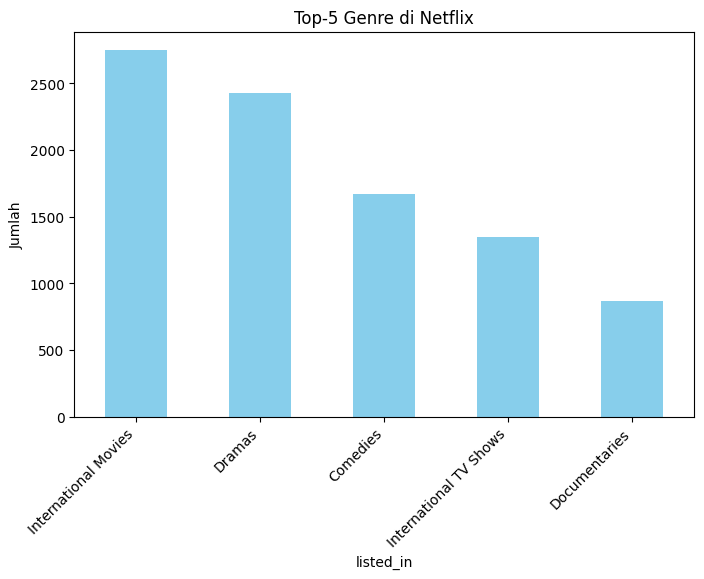


Top-5 Negara paling banyak:
country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Name: count, dtype: int64


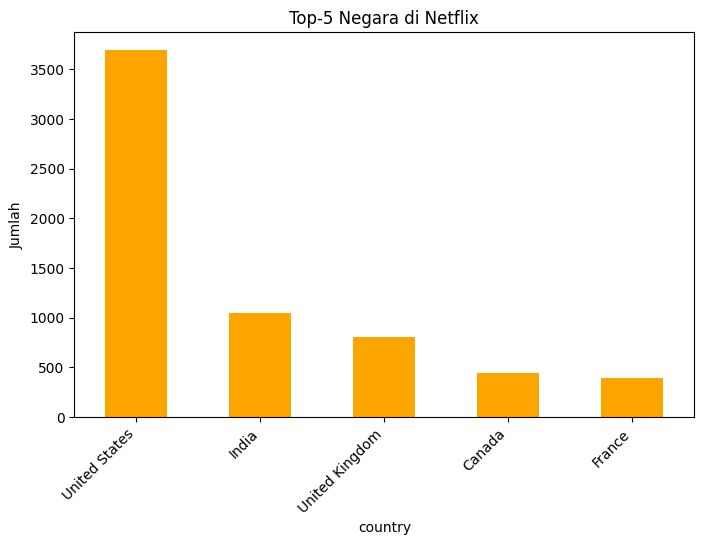


Sebaran rating antara Movie & TV Show:


rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1,1,1,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3
TV Show,0,0,0,0,0,5,0,0,2,733,94,1145,323,176,195,1,0


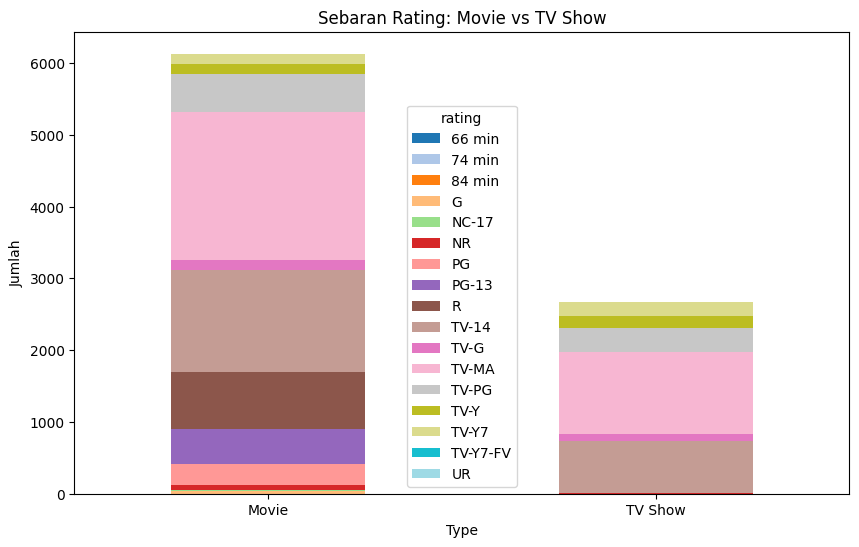


Tahun dengan jumlah konten terbanyak:
release_year
2018    1147
Name: count, dtype: int64


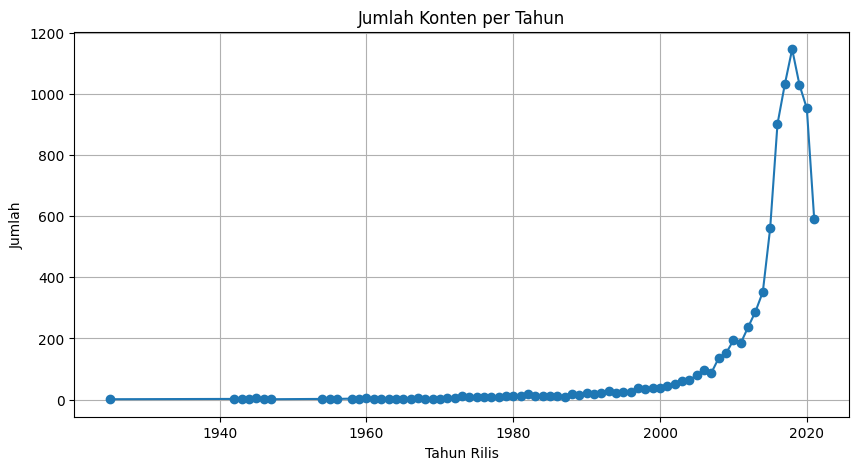


Durasi rata-rata Movie (menit): 99.58
Rata-rata jumlah Season TV Show: 1.76


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("./file/NetlixDataset.csv")

print("Preview dataset:")
display(df.head())

# =========================
# 1. Top-5 Genre paling banyak
# =========================
# Kolom "listed_in" biasanya berisi genre
genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
top5_genre = genre_series.value_counts().head(5)

print("\nTop-5 Genre paling banyak:")
print(top5_genre)

# Visualisasi
plt.figure(figsize=(8,5))
top5_genre.plot(kind="bar", color="skyblue")
plt.title("Top-5 Genre di Netflix")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.show()

# =========================
# 2. Top-5 Negara paling banyak
# =========================
country_series = df['country'].dropna().str.split(',').explode().str.strip()
top5_country = country_series.value_counts().head(5)

print("\nTop-5 Negara paling banyak:")
print(top5_country)

# Visualisasi
plt.figure(figsize=(8,5))
top5_country.plot(kind="bar", color="orange")
plt.title("Top-5 Negara di Netflix")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.show()

# =========================
# 3. Kelompokkan Movie vs TV Show dan sebaran rating
# =========================
rating_distribution = df.groupby(["type", "rating"]).size().unstack(fill_value=0)

print("\nSebaran rating antara Movie & TV Show:")
display(rating_distribution)

# Visualisasi
rating_distribution.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Sebaran Rating: Movie vs TV Show")
plt.ylabel("Jumlah")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()

# =========================
# 4. Tahun dengan jumlah konten terbanyak
# =========================
top_year = df["release_year"].value_counts().head(1)

print("\nTahun dengan jumlah konten terbanyak:")
print(top_year)

# Visualisasi distribusi tahun
plt.figure(figsize=(10,5))
df["release_year"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Jumlah Konten per Tahun")
plt.ylabel("Jumlah")
plt.xlabel("Tahun Rilis")
plt.grid(True)
plt.show()

# =========================
# 5. Analisis durasi rata-rata Movie & TV Show
# =========================
# Movie durasi dalam "duration" biasanya menit, TV Show dalam "Seasons"
movies = df[df["type"]=="Movie"].copy()
tvshows = df[df["type"]=="TV Show"].copy()

# Ambil angka dari kolom duration
movies["duration_num"] = movies["duration"].str.replace(" min","", regex=False).astype(float)
tvshows["duration_num"] = tvshows["duration"].str.replace(" Season","", regex=False).str.replace("s","", regex=False).astype(float)

avg_movie_duration = movies["duration_num"].mean()
avg_tvshow_seasons = tvshows["duration_num"].mean()

print("\nDurasi rata-rata Movie (menit):", round(avg_movie_duration,2))
print("Rata-rata jumlah Season TV Show:", round(avg_tvshow_seasons,2))
